In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd

from datetime import date, datetime, time, timedelta
from functools import partial
from multiprocessing import Pool

In [2]:
files = glob.glob('./data/*.txt.gz')
traffic = pd.read_csv(files[0], header=None)
traffic

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,07/01/2020 00:00:00,1100313,11,5,N,FR,NaN,10,100,8.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,07/01/2020 00:00:00,1100323,11,5,N,FR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,07/01/2020 00:00:00,1100326,11,5,N,FR,NaN,20,100,8.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,07/01/2020 00:00:00,1100330,11,5,N,FR,NaN,20,100,3.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,07/01/2020 00:00:00,1100333,11,5,N,FR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433278,07/01/2020 23:55:00,1127185,11,5,N,ML,0.661,40,100,61.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
433279,07/01/2020 23:55:00,1127188,11,5,N,FR,NaN,20,100,3.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
433280,07/01/2020 23:55:00,1127191,11,52,E,FR,NaN,10,100,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
433281,07/01/2020 23:55:00,1127195,11,5,N,FR,NaN,20,100,3.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [3]:
timestamp_idx = 0
total_flow_idx = 9
speed_idx = 11
start_time = time(16)
duration = timedelta(hours=3)

In [4]:
def traffic_all_sensors(filename, start_time, duration):
    traffic = pd.read_csv(filename, header=None)
    traffic[timestamp_idx] = pd.to_datetime(traffic[timestamp_idx])
    
    file_date = traffic[timestamp_idx][0].date()
    start = datetime.combine(file_date, start_time)
    stop = start + duration
    
    group = traffic.groupby(timestamp_idx)
    vehicles = group[total_flow_idx].sum()[start:stop].sum()
    speed = group[speed_idx].mean()[start:stop].mean()
    
    return file_date, vehicles, speed

In [5]:
fun = partial(traffic_all_sensors, start_time=start_time, duration=duration)

pool = Pool()
results = pool.map(fun, files)

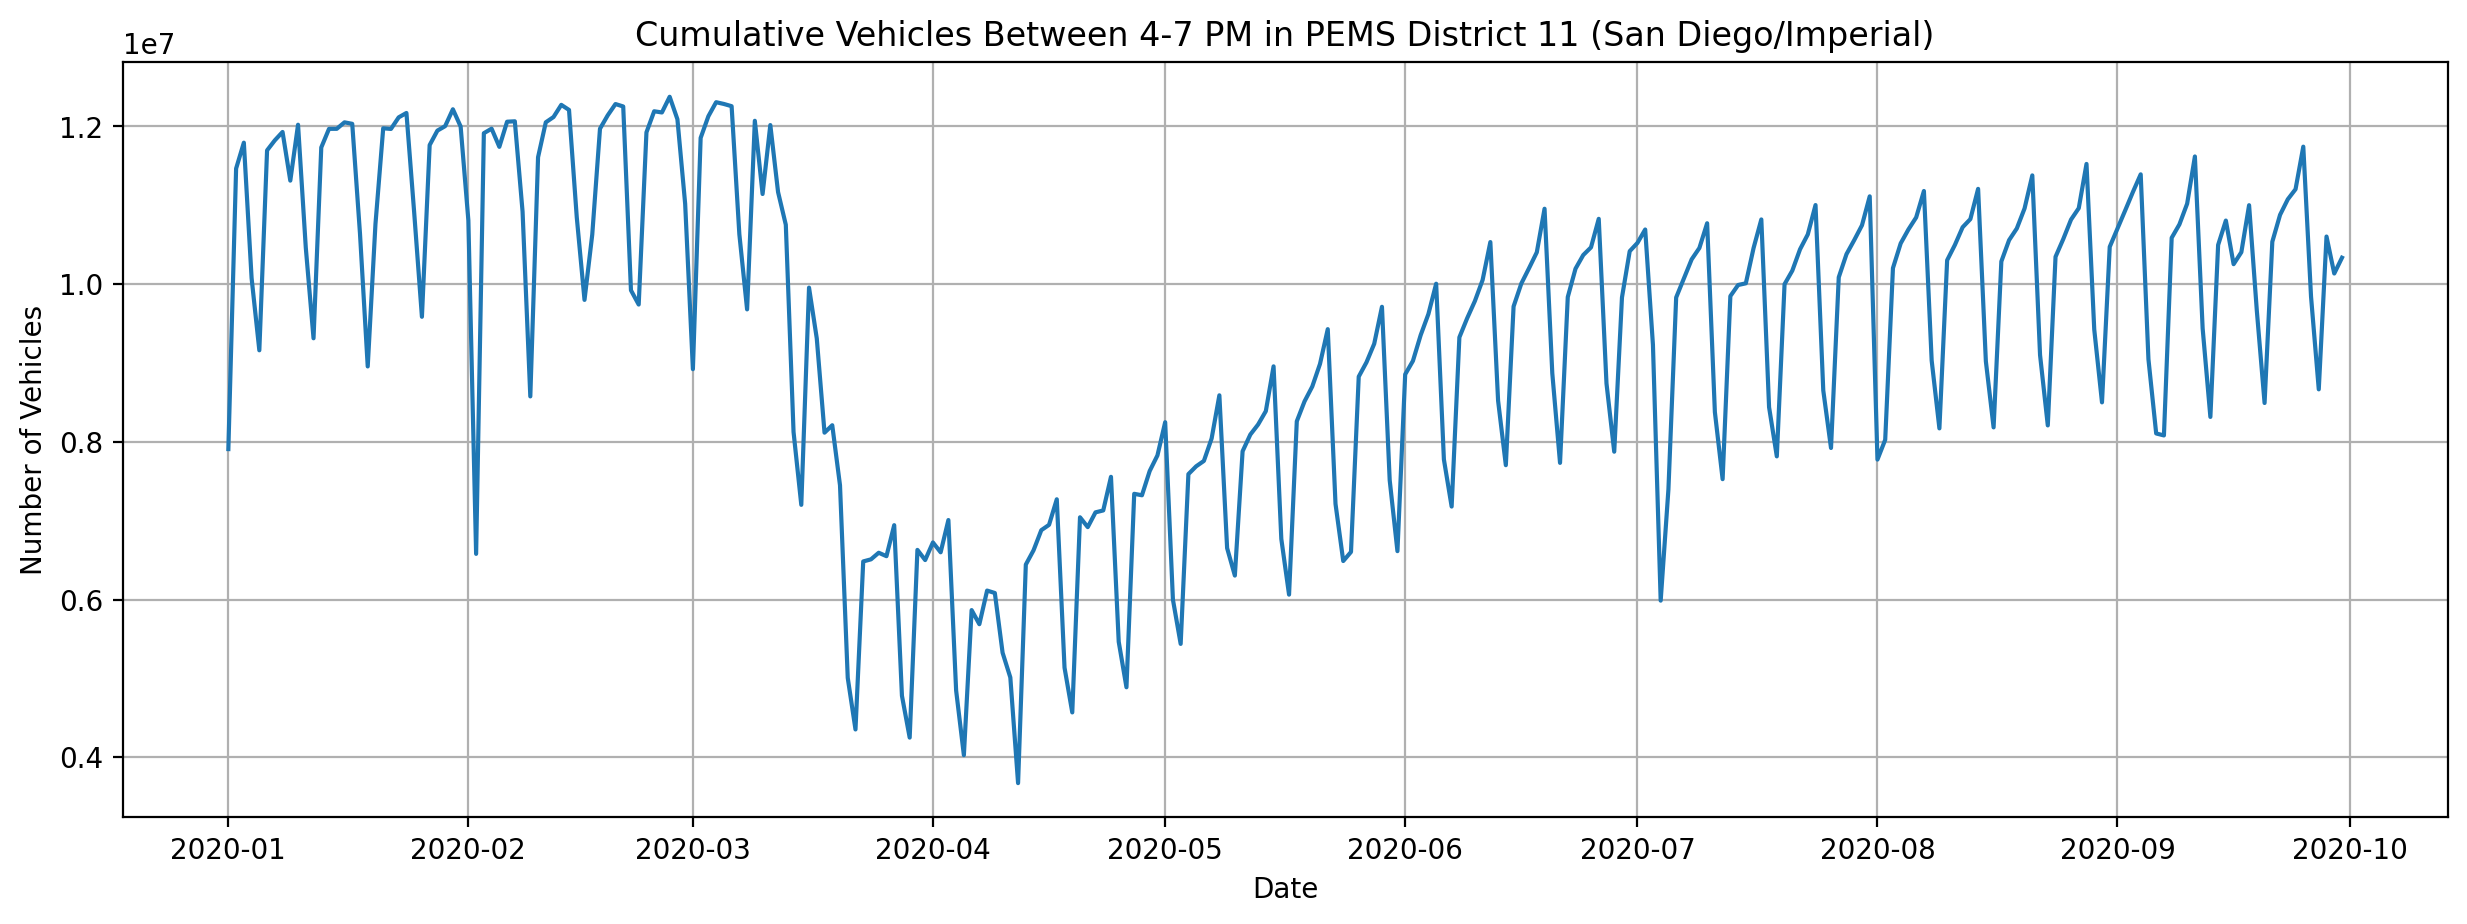

In [6]:
dates, vehicles, speed = list(zip(*sorted(results)))
stop_time = datetime.combine(date.today(), start_time) + duration
time_range = f'{start_time.strftime("%-I")}-{stop_time.strftime("%-I %p")}'

plt.figure(figsize=(15,5), dpi=200)
plt.plot(dates, vehicles)
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title(f'Cumulative Vehicles Between {time_range} in PEMS District 11 (San Diego/Imperial)')
plt.grid()

plt.savefig('traffic_vehicles_sd', bbox_inches='tight')

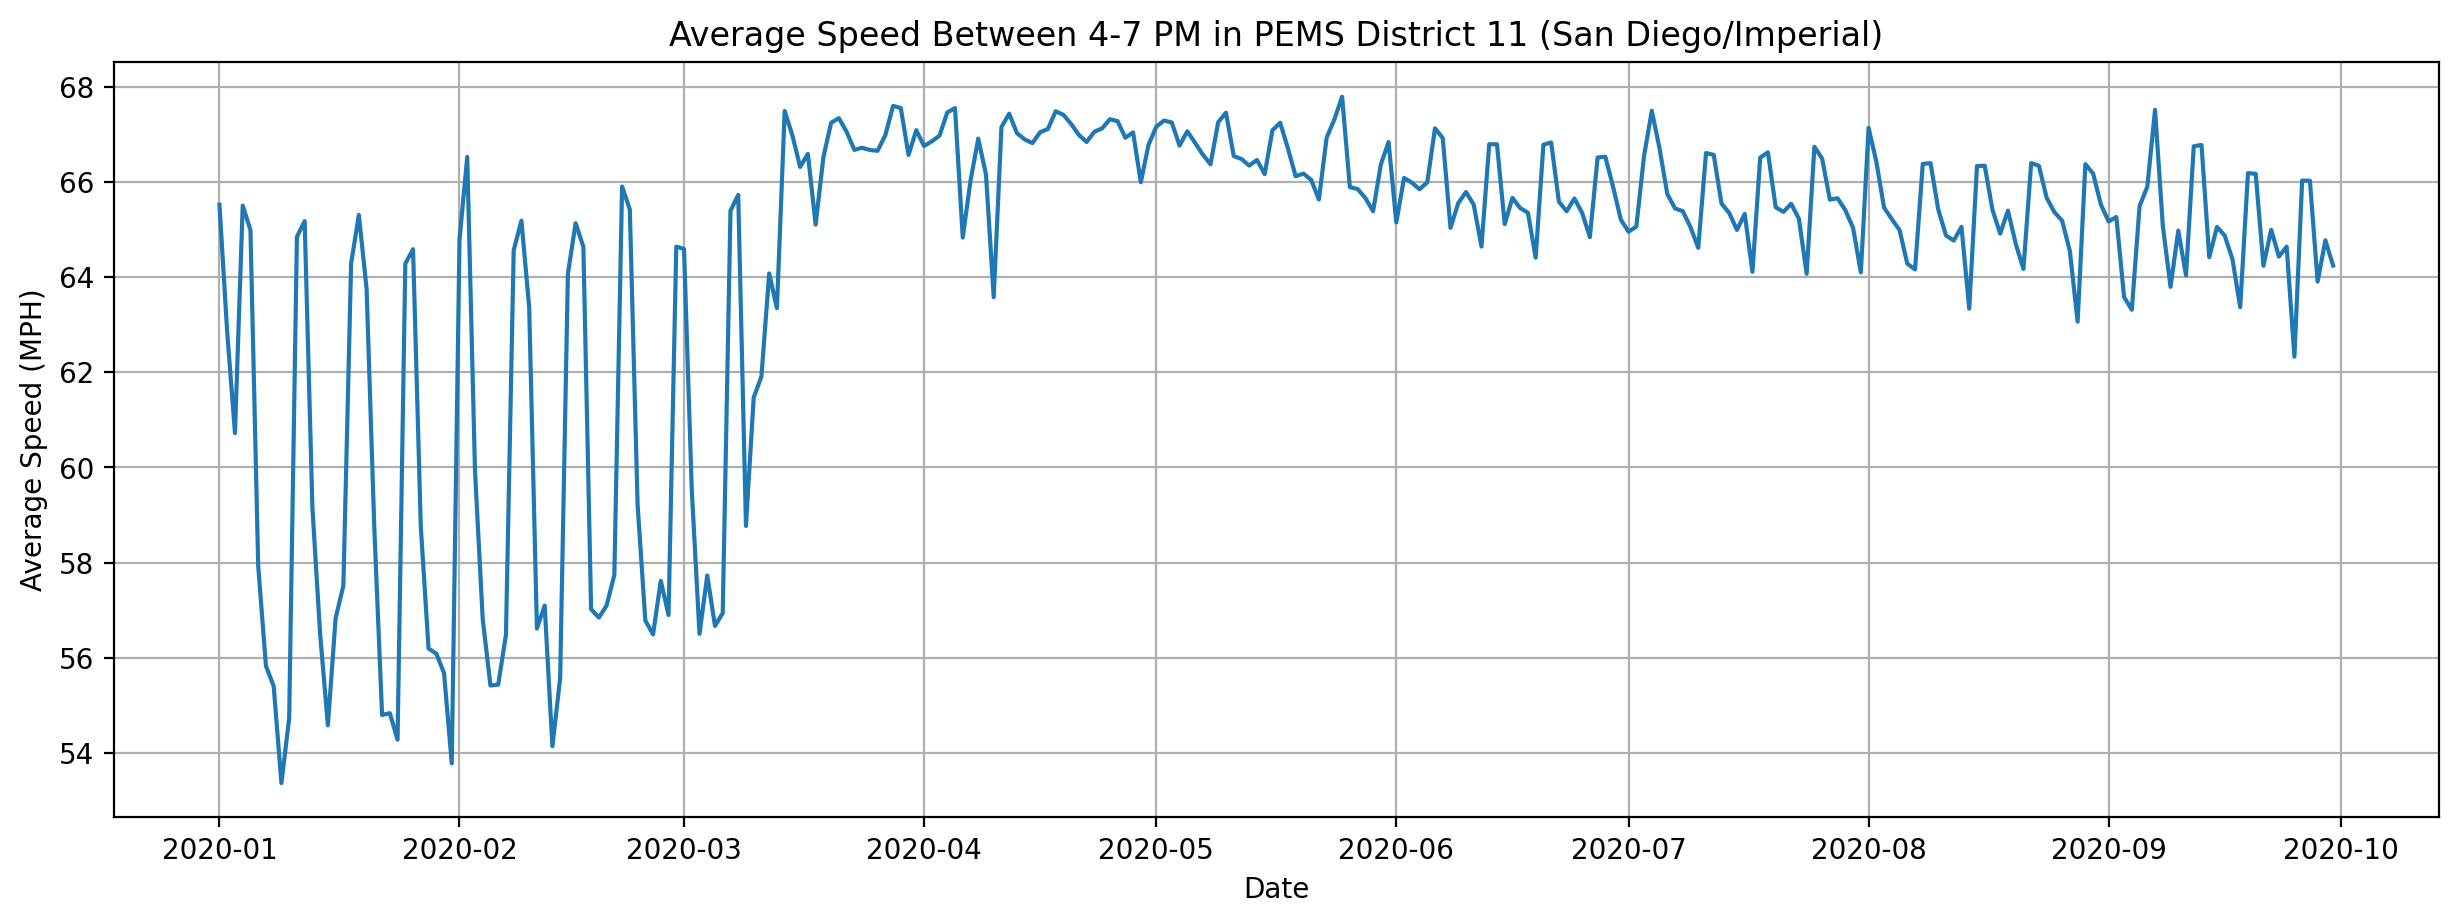

In [7]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(dates, speed)
plt.xlabel('Date')
plt.ylabel('Average Speed (MPH)')
plt.title(f'Average Speed Between {time_range} in PEMS District 11 (San Diego/Imperial)')
plt.grid()

plt.savefig('traffic_speed_sd', bbox_inches='tight')